In [1]:
import json
import urllib.request
url = 'https://data.houstontx.gov/api/3/action/datastore_search?resource_id=34b676df-4ff1-412a-b8d0-83eda0306388&limit=22000'  
fileobj = urllib.request.urlopen(url)
response_dict = json.loads(fileobj.read())

In [2]:
from pprint import pprint
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
main_df = pd.DataFrame.from_dict(response_dict['result']['records'])
main_df.head()

,_id,Hash1,Hash2,Birth Year,Gender,Race,Pay Grade,FLSA Status,EEOJ Code,Employment Type,...,Department Name,Status,Year,Date Position Began,Date Position Ended,Annual Base Salary,Gross Pay,Base Pay,Overtime Pay,Other Pay
0,1,06ACB25FC294CBDCA6733DEBD3AE86EF05A6AC4F,80040B81554B5DEBF716D515DC58974D1517B052,1944,Male,Black or African American,25,Exempt,A: Officials & Administrators,Full Time,...,Health & Human Services,Active,2023,1/21/2023,None,95579.0,4955.13,4867.13,0.0,88.00
1,2,6BF073A8D7B72FC614915C9C562E32652B81498F,1DA2A3CBECC8294BD250F387FE8CBFA8C2B53F4B,1951,Female,Hispanic/Latino,24,Exempt,B: Professionals,Part time,...,Parks & Recreation,Active,2023,8/5/2023,None,68994.0,2637.01,2637.01,0.0,0.00
2,3,945CE1315B9453C5D7954FD92755BA8F3A386901,C007E17BE86835374EEA0D64CB4DAA2838A60931,1947,Female,White,24,Non-Exempt,B: Professionals,Full Time,...,Legal,Active,2023,1/21/2023,None,90938.0,7209.20,6995.20,0.0,214.00
3,4,C754993749114969AF870E95D9B044D3A392674C,830943250BB9FFD18944C01411E60FDFFCEC50E3,1949,Male,Hispanic/Latino,FE05 - 17,Non-Exempt,D: Protective Service Workers,Full Time,...,Fire,Active,2023,1/21/2023,None,84108.0,6856.04,6469.86,0.0,386.18
4,5,F50E44EDADB2418337CF4B0A1BEF99CDE568F30F,D63D0D8C8FAE43BC6F367EB96C62611999DB2B09,1950,Male,Black or African American,18,Non-Exempt,C: Technicians,Part time,...,Parks & Recreation,Active,2023,8/4/2023,None,62296.0,3099.83,3099.83,0.0,0.00


In [42]:
main_df['Gender'].value_counts()

Gender
Male      14959
Female     6686
Name: count, dtype: int64

In [10]:
main_df = main_df.drop(columns=['_id','Hash1','Hash2'])

main_df = main_df.drop(columns=['Gross Pay', 'Base Pay', 'Overtime Pay', 'Other Pay'])

In [16]:
main_df['Birth Year'] = main_df['Birth Year'].astype('int')

Text(0.5, 0, 'I am calling this axis the Birth year')

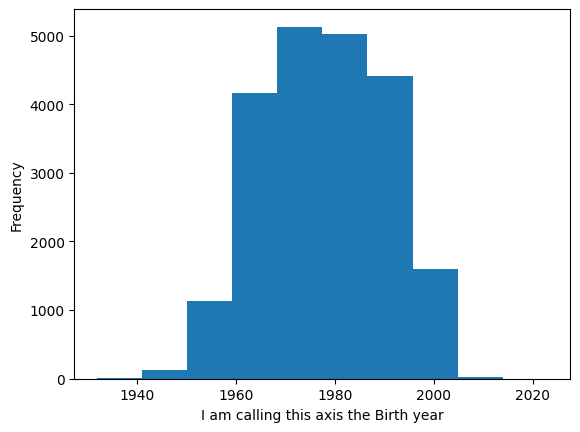

In [48]:
main_df['Birth Year'].plot.hist(bins=10)
plt.xlabel("I am calling this axis the Birth year")

Text(0, 0.5, 'This is my new y label')

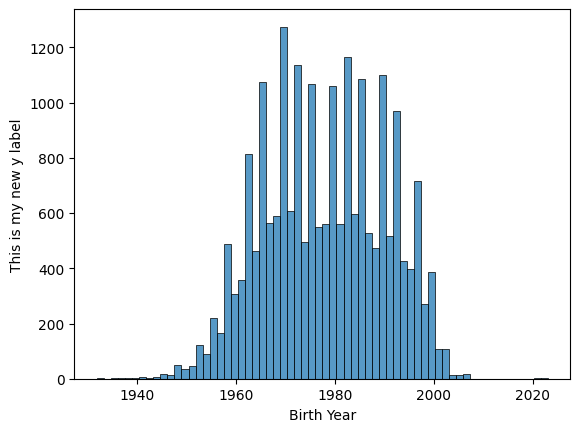

In [50]:
sns.histplot(main_df['Birth Year'])
plt.ylabel("This is my new y label")

<Axes: xlabel='Birth Year', ylabel='Annual Base Salary'>

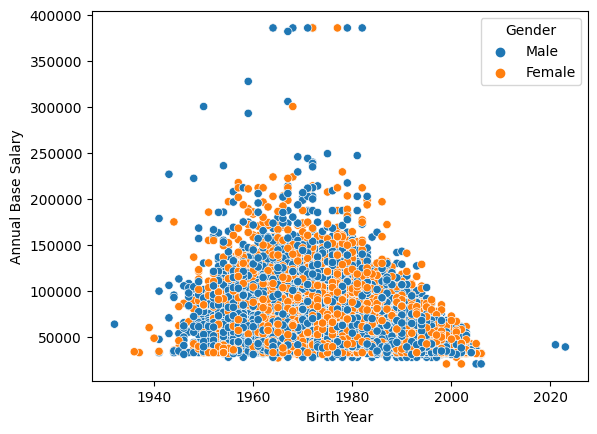

In [55]:
sns.scatterplot(x=main_df['Birth Year'], 
                y = main_df['Annual Base Salary'], hue = main_df['Gender'])

In [56]:
main_df.groupby('Gender')['Annual Base Salary'].mean()

Gender
Female    66499.273270
Male      72230.206744
Name: Annual Base Salary, dtype: float64

<Axes: xlabel='Annual Base Salary', ylabel='Count'>

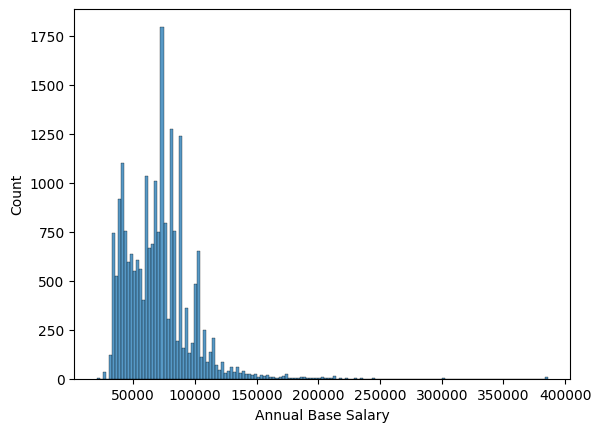

In [24]:
sns.histplot(main_df['Annual Base Salary'])

In [26]:
main_df.shape

(21645, 14)

### Create a Training and Testing Dataset

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X = main_df.drop(columns=['Annual Base Salary'])

y = main_df['Annual Base Salary']

In [30]:
X

,Birth Year,Gender,Race,Pay Grade,FLSA Status,EEOJ Code,Employment Type,Department ID,Department Name,Status,Year,Date Position Began,Date Position Ended
0,1944,Male,Black or African American,25,Exempt,A: Officials & Administrators,Full Time,3800,Health & Human Services,Active,2023,1/21/2023,None
1,1951,Female,Hispanic/Latino,24,Exempt,B: Professionals,Part time,3600,Parks & Recreation,Active,2023,8/5/2023,None
2,1947,Female,White,24,Non-Exempt,B: Professionals,Full Time,9000,Legal,Active,2023,1/21/2023,None
3,1949,Male,Hispanic/Latino,FE05 - 17,Non-Exempt,D: Protective Service Workers,Full Time,1200,Fire,Active,2023,1/21/2023,None
4,1950,Male,Black or African American,18,Non-Exempt,C: Technicians,Part time,3600,Parks & Recreation,Active,2023,8/4/2023,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,1976,Female,Asian,20,Exempt,B: Professionals,Part time,2000,Houston Public Works,Active,2023,10/23/2023,None
21641,1976,Female,Black or African American,13,Non-Exempt,E: Para-Professionals,Part time,2000,Houston Public Works,Active,2023,10/23/2023,None
21642,1983,Male,Hispanic/Latino,13,Non-Exempt,G: Skilled Craft Workers,Part time,2800,Houston Airport System,Active,2023,10/23/2023,None
21643,1966,Female,Black or African American,30,Exempt,A: Officials & Administrators,Part time,3800,Health & Human Services,Active,2023,10/24/2023,None


In [31]:
y

0         95579.0
1         68994.0
2         90938.0
3         84108.0
4         62296.0
           ...   
21640     66000.0
21641     39437.0
21642     42432.0
21643    115000.0
21644     33072.0
Name: Annual Base Salary, Length: 21645, dtype: float64

In [33]:
X = pd.get_dummies(X, drop_first=True)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linreg = LinearRegression()

linreg.fit(X,y)

LinearRegression()

In [36]:
y_preds = linreg.predict(X)

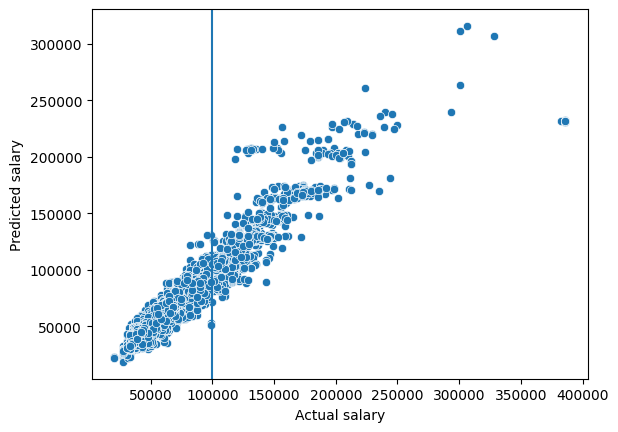

In [40]:
sns.scatterplot(x=y, y=y_preds)
plt.xlabel("Actual salary")
plt.ylabel("Predicted salary")
plt.axvline(100000)